### Handwritten digits classification using neural network

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train, y_train) , (x_test, y_test) = datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

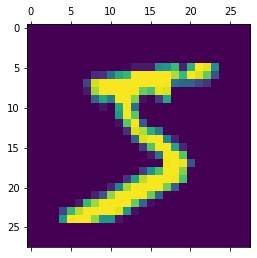

In [8]:
plt.matshow(x_train[0])

### Normalization

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [13]:
x_train_flattened.shape

(60000, 784)

### Very simple neural network with no hidden layers

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_flattened,y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4864 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3058 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2855 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2747 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9265


In [16]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.9268


[0.26866215467453003, 0.926800012588501]

In [17]:
y_pred = model.predict(x_test_flattened)
y_pred[0]

array([2.5558147e-05, 1.0871314e-10, 5.8475180e-05, 9.4376504e-03,
       8.1682549e-07, 8.7384477e-05, 2.0689919e-09, 6.7561829e-01,
       7.1697374e-05, 7.2944164e-04], dtype=float32)

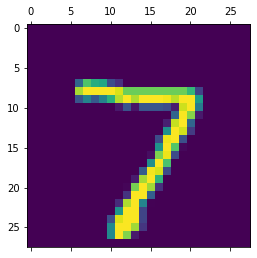

In [18]:
plt.matshow(x_test[0])

### np.argmax finds a maximum element from an array and returns the index of it

In [19]:
np.argmax(y_pred[0])

7

In [20]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [21]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    1,    0,    5,    7,    2,    1,    0],
       [   0, 1110,    4,    1,    0,    1,    4,    2,   13,    0],
       [   7,    7,  934,   14,    6,    4,   14,    8,   33,    5],
       [   3,    0,   22,  901,    0,   37,    6,    9,   24,    8],
       [   1,    1,    4,    1,  902,    0,   15,    4,    9,   45],
       [  11,    2,    4,   14,    7,  792,   20,    4,   30,    8],
       [   9,    3,    4,    1,    7,   10,  922,    1,    1,    0],
       [   2,    6,   26,    7,    8,    1,    0,  937,    3,   38],
       [   7,    6,    6,   17,    9,   32,   11,    7,  874,    5],
       [  11,    6,    1,    7,   16,    7,    0,   19,   10,  932]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

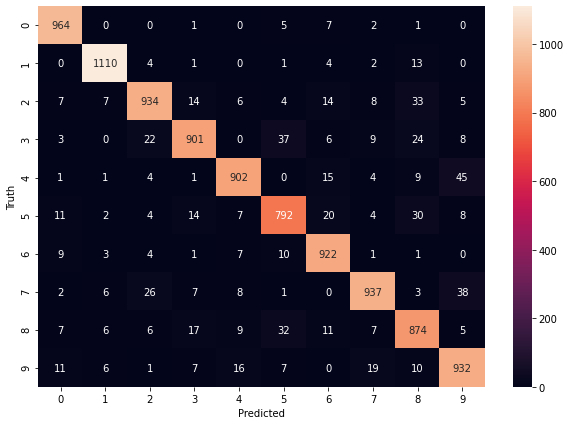

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using a hiden layer

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2929 - accuracy: 0.9179
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1356 - accuracy: 0.9606
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0972 - accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0753 - accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0622 - accuracy: 0.9804


In [24]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9757


[0.08153795450925827, 0.9757000207901001]

Text(69.0, 0.5, 'Truth')

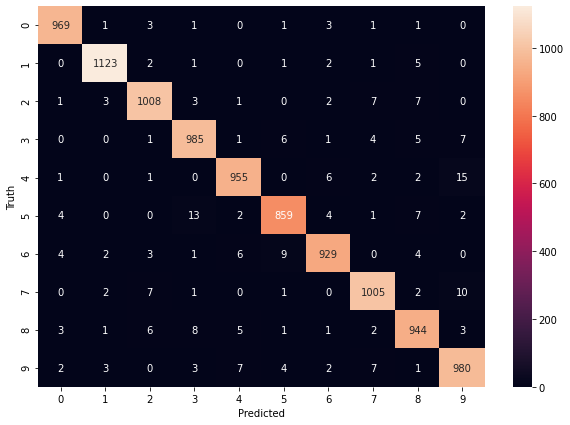

In [25]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset


In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.9198
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1303 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0927 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0711 - accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0583 - accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0473 - accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0385 - accuracy: 0.9884
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9902
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9916
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.024